No handles with labels found to put in legend.


                                             Symptoms
0     cough, "fatigue", "fever", "sputum", "myalgias"
1         shortness of breath, "respiratory symptoms"
2                            cough, "sputum", "fever"
3                                               cough
4                        chest pain, "cough", "fever"
...                                               ...
1509                                            cough
1510                        fever, cough, sore throat
1511                                            fever
1512                               sore throat, fever
1513                                            cough

[1514 rows x 1 columns]
614 1119 171 277 141


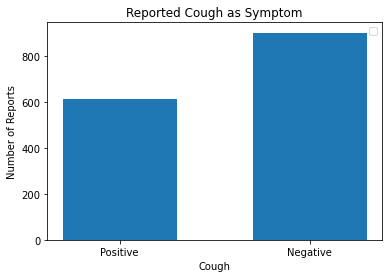

Cough - Positive:

No handles with labels found to put in legend.


 40.554821664464995 %, Negative 59.445178335535005 %


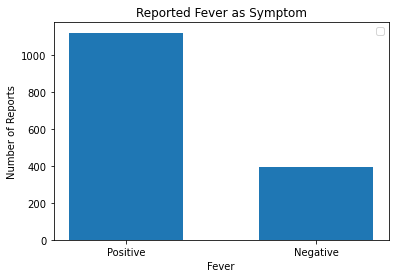

No handles with labels found to put in legend.


Fever - Positive: 73.91017173051519 %, Negative 26.08982826948481 %


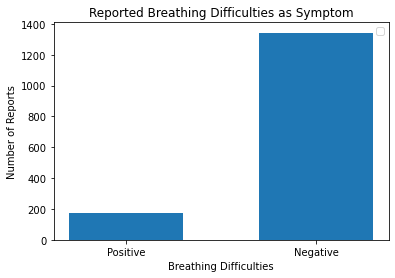

Breathing Difficulties - Positive: 11.29458388375165 %, Negative 88.70541611624834 %


No handles with labels found to put in legend.


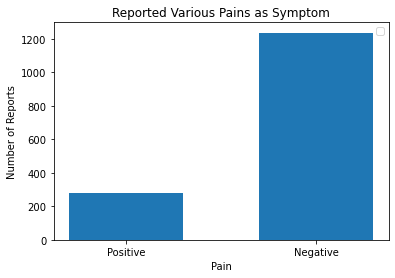

No handles with labels found to put in legend.


Various Pains - Positive: 18.295904887714663 %, Negative 81.70409511228533 %


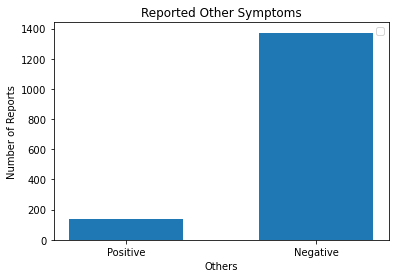

Other Symptoms - Positive: 9.313077939233818 %, Negative 90.68692206076618 %


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

dataset1 = pd.read_csv(r'C:\Users\HP\Desktop\project\PRO\data\WolframPatients.csv')
dataset2 = pd.read_csv(r'C:\Users\HP\Desktop\project\PRO\data\NovelDataset.csv')

has_symptoms1 = dataset1[dataset1.Symptoms.notnull()]
has_symptoms2 = dataset2[dataset2.Symptoms.notnull()]

sympt_list_1 = pd.DataFrame(has_symptoms1, columns=['Symptoms'])
sympt_list_2 = pd.DataFrame(has_symptoms2, columns=['Symptoms'])

symptoms = sympt_list_1.append(sympt_list_2, ignore_index=True, sort=False)

print(symptoms)

total_count = len(symptoms.axes[0])

cough_count = len(symptoms[symptoms['Symptoms'].str.contains("cough")].axes[0])
fever_count = len(symptoms[symptoms['Symptoms'].str.contains("fever")].axes[0])
pain_count = len(symptoms[symptoms['Symptoms'].str.contains("sore")].axes[0]) + \
             len(symptoms[symptoms['Symptoms'].str.contains("myalgias")].axes[0]) + \
             len(symptoms[symptoms['Symptoms'].str.contains("ache")].axes[0])
breath_count = len(symptoms[symptoms['Symptoms'].str.contains("breath")].axes[0]) + \
               len(symptoms[symptoms['Symptoms'].str.contains("pneumo")].axes[0]) + \
               len(symptoms[symptoms['Symptoms'].str.contains("phary")].axes[0]) + \
               len(symptoms[symptoms['Symptoms'].str.contains("gasp")].axes[0])
other_count = len(symptoms[symptoms['Symptoms'].str.contains("diarrhea")].axes[0]) + \
              len(symptoms[symptoms['Symptoms'].str.contains("energy")].axes[0]) + \
              len(symptoms[symptoms['Symptoms'].str.contains("fatigue")].axes[0]) + \
              len(symptoms[symptoms['Symptoms'].str.contains("weakness")].axes[0])

print(cough_count, fever_count, breath_count, pain_count, other_count)


plt.bar(["Positive", "Negative"], [cough_count, total_count - cough_count], width=.6)
plt.legend()
plt.xlabel('Cough')
plt.ylabel('Number of Reports')
plt.title('Reported Cough as Symptom')
plt.show()
print("Cough - Positive:", cough_count*100/total_count, "%,",
      "Negative", (total_count - cough_count)*100/total_count, "%")

plt.bar(["Positive", "Negative"], [fever_count, total_count - fever_count], width=.6)
plt.legend()
plt.xlabel('Fever')
plt.ylabel('Number of Reports')
plt.title('Reported Fever as Symptom')
plt.show()
print("Fever - Positive:", fever_count*100/total_count, "%,",
      "Negative", (total_count - fever_count)*100/total_count, "%")

plt.bar(["Positive", "Negative"], [breath_count, total_count - breath_count], width=.6)
plt.legend()
plt.xlabel('Breathing Difficulties')
plt.ylabel('Number of Reports')
plt.title('Reported Breathing Difficulties as Symptom')
plt.show()
print("Breathing Difficulties - Positive:", breath_count*100/total_count, "%,",
      "Negative", (total_count - breath_count)*100/total_count, "%")

plt.bar(["Positive", "Negative"], [pain_count, total_count - pain_count], width=.6)
plt.legend()
plt.xlabel('Pain')
plt.ylabel('Number of Reports')
plt.title('Reported Various Pains as Symptom')
plt.show()
print("Various Pains - Positive:", pain_count*100/total_count, "%,",
      "Negative", (total_count - pain_count)*100/total_count, "%")

plt.bar(["Positive", "Negative"], [other_count, total_count - other_count], width=.6)
plt.legend()
plt.xlabel('Others')
plt.ylabel('Number of Reports')
plt.title('Reported Other Symptoms')
plt.show()
print("Other Symptoms - Positive:", other_count*100/total_count, "%,",
      "Negative", (total_count - other_count)*100/total_count, "%")





In [10]:
def calc_additional_risks(age, env_inp, hypertension_inp, diabetes_inp, cardiovascular_inp, respiratory_inp, immune_inp):

    # print("Enter 0 for 'No' and 1 for 'Yes'")
    # age, env_inp, hypertension_inp, diabetes_inp, cardiovascular_inp, respiratory_inp, immune_inp, = \
    #     int(input("Age: ")), (input("Polluted Env? ")), (input("Hypertension? ")), (input("Diabetes? ")), \
    #     (input("Cardiovascular issues? ")), (input("Respiratory issues? ")), (input("Immunological issues? "))

    if env_inp == '1': env = True
    else: env = False
    if hypertension_inp == '1': hypertension = True
    else: hypertension = False
    if diabetes_inp == '1': diabetes = True
    else: diabetes = False
    if cardiovascular_inp == '1': cardiovascular = True
    else: cardiovascular = False
    if respiratory_inp == '1': respiratory = True
    else: respiratory = False
    if immune_inp == '1': immune = True
    else: immune = False

    print(age, env, hypertension, diabetes, cardiovascular, respiratory, immune, )

    rm = 0.0

    if age <= 10: rm += 0.5
    elif age >= 80: rm += 1.5
    elif age >= 60: rm += 1
    elif age >= 50: rm += 0.5

    if env: rm += 1
    if hypertension: rm += 1.5
    if diabetes: rm += 1.5
    if cardiovascular: rm += 1
    if respiratory: rm += 3
    if immune: rm += 4

    if rm > 10: rm = 10

    return rm


In [11]:
from pyit2fls import IT2FS, trapezoid_mf, tri_mf, IT2FS_Gaussian_UncertMean, \
    IT2FS_plot, IT2FLS, min_t_norm, max_s_norm, TR_plot, crisp
from numpy import linspace
from additional_risks import calc_additional_risks


def calculate_FLS(cough_inp, fever_inp, breath_inp, age, env_inp, hypertension_inp, diabetes_inp, cardiovascular_inp,
                  respiratory_inp, immune_inp):
    severity = linspace(0.0, 10.0, 100)

    # For IT2FS_Gaussian_UncertMean, the parameters define:
    # 1 - The tip of the center point of the curve
    # 2 - The width of the lower curve (higher value = lower width)
    # 3 - The height of the lower curve (higher value = higher tip)
    # 4 - The height of the center point of the outer curve.

    Cough_neg = IT2FS(severity, trapezoid_mf, [0., 0.001, 3, 7, 1.0],
                      tri_mf, [0, 0.001, 2, 0.5])
    Cough_pos = IT2FS(severity, trapezoid_mf, [5, 8, 9.999, 10, 1.0],
                      tri_mf, [8.5, 9.999, 10, 0.5])

    Fever_low = IT2FS_Gaussian_UncertMean(severity, [0, 2.65, 1, 1.0])
    Fever_mod = IT2FS_Gaussian_UncertMean(severity, [5, 2.65, 1, 1.0])
    Fever_high = IT2FS_Gaussian_UncertMean(severity, [10, 2.65, 1, 1.0])

    BreathDiff_low = IT2FS_Gaussian_UncertMean(severity, [0, 1.75, 1, 1.0])
    BreathDiff_mod = IT2FS_Gaussian_UncertMean(severity, [5, 2.5, 1, 1.0])
    BreathDiff_extr = IT2FS_Gaussian_UncertMean(severity, [10, 1.75, 1, 1.0])

    Add_low = IT2FS_Gaussian_UncertMean(severity, [0, 5, 2, 1.0])
    Add_high = IT2FS_Gaussian_UncertMean(severity, [10, 5, 2, 1.0])

    Risk_low = IT2FS_Gaussian_UncertMean(severity, [0, 3, 1, 1.0])
    Risk_high = IT2FS_Gaussian_UncertMean(severity, [6.5, 2, 1, 1.0])
    Risk_veryhigh = IT2FS_Gaussian_UncertMean(severity, [10.7, 1, 1, 1.0])

    def plot_cough_mf():
        IT2FS_plot(Cough_neg, Cough_pos,
                   title="Cough",
                   legends=["Negative", "Positive"],
                   )

    def plot_fever_mf():
        IT2FS_plot(Fever_low, Fever_mod, Fever_high,
                   title="Fever",
                   legends=["Low", "Moderate", "High"],
                   )

    def plot_additional_mf():
        IT2FS_plot(Add_low, Add_high,
                   title="Additional Risks",
                   legends=["Low", "High"],
                   )

    def plot_breathdiff_mf():
        IT2FS_plot(BreathDiff_low, BreathDiff_mod, BreathDiff_extr,
                   title="Breathing Difficulty",
                   legends=["Low", "Moderate", "High"],
                   )

    def plot_risk_mf():
        IT2FS_plot(Risk_low, Risk_high, Risk_veryhigh,
                   title="Overall Risk",
                   legends=["Unlikely", "Likely", "Extremely Likely"],
                   )

    plot_fever_mf()
    plot_cough_mf()
    plot_breathdiff_mf()
    plot_additional_mf()

    plot_risk_mf()

    myIT2FLS = IT2FLS()

    myIT2FLS.add_input_variable("cough")
    myIT2FLS.add_input_variable("fever")
    myIT2FLS.add_input_variable("breath")
    myIT2FLS.add_input_variable("add")
    myIT2FLS.add_output_variable("risk")

    myIT2FLS.add_rule([("cough", Cough_neg), ("fever", Fever_low), ("breath", BreathDiff_low), ("add", Add_low)],
                      [("risk", Risk_low)])
    myIT2FLS.add_rule([("cough", Cough_pos), ("fever", Fever_mod), ("breath", BreathDiff_low), ("add", Add_low)],
                      [("risk", Risk_low)])
    myIT2FLS.add_rule([("cough", Cough_neg), ("fever", Fever_high), ("breath", BreathDiff_low), ("add", Add_low)],
                      [("risk", Risk_low)])
    myIT2FLS.add_rule([("cough", Cough_neg), ("fever", Fever_high), ("breath", BreathDiff_low), ("add", Add_high)],
                      [("risk", Risk_low)])
    myIT2FLS.add_rule([("cough", Cough_neg), ("fever", Fever_low), ("breath", BreathDiff_extr), ("add", Add_low)],
                      [("risk", Risk_high)])
    myIT2FLS.add_rule([("cough", Cough_neg), ("fever", Fever_high), ("breath", BreathDiff_mod), ("add", Add_low)],
                      [("risk", Risk_high)])
    myIT2FLS.add_rule([("cough", Cough_pos), ("fever", Fever_mod), ("breath", BreathDiff_mod), ("add", Add_high)],
                      [("risk", Risk_veryhigh)])
    myIT2FLS.add_rule([("cough", Cough_pos), ("fever", Fever_low), ("breath", BreathDiff_extr), ("add", Add_high)],
                      [("risk", Risk_veryhigh)])
    myIT2FLS.add_rule([("cough", Cough_pos), ("fever", Fever_mod), ("breath", BreathDiff_mod), ("add", Add_high)],
                      [("risk", Risk_veryhigh)])
    myIT2FLS.add_rule([("cough", Cough_pos), ("fever", Fever_high), ("breath", BreathDiff_extr), ("add", Add_high)],
                      [("risk", Risk_veryhigh)])

    # cough_inp = float(input("Enter severity of coughing, between 0 and 10: "))
    # fever_inp = float(input("Enter severity of fever, between 0 and 10: "))
    # breath_inp = float(input("Enter severity of breathing difficulty, between 0 and 10: "))
    # print("Input age and other additional risk factors.")
    add_inp = calc_additional_risks(age, env_inp, hypertension_inp, diabetes_inp, cardiovascular_inp, respiratory_inp,
                                    immune_inp)

    it2out, tr = myIT2FLS.evaluate({"cough": cough_inp, "fever": fever_inp, "breath": breath_inp, "add": add_inp},
                                   min_t_norm, max_s_norm, severity,
                                   method="Centroid", algorithm="EKM")
    print(tr)
    print(it2out)

    it2out["risk"].plot(title="Type-2 output MF converted to Type-1")
    TR_plot(severity, tr["risk"])
    print("Chance of C19 Infection: ", int((crisp(tr["risk"])) * 10), "%")

    return int((crisp(tr["risk"])) * 10)

# print(calculate_FLS(), "%")


In [ ]:
import tkinter
from tkinter import *
import fls_main

root = Tk()
root.title("C19 Checker")

line1 = Label(root, text="If you are suffering from various symptoms of COVID-19").pack()
line2 = Label(root, text="This program will try to calculate the odds you have it.").pack()
line3 = Label(root, text="Therefore, please input your symptoms or the intensity.").pack()
line4 = Label(root, text="(0 is least)").pack()

cough, fever, breath = DoubleVar(), DoubleVar(), DoubleVar()

cough_label = Label(root, text="Intensity of coughing.").pack()
cough_slider = Scale(root, from_=0, to=9.9, orient=HORIZONTAL, resolution=0.1, variable=cough)
cough_slider.pack()

fever_label = Label(root, text="Intensity of fever.").pack()
fever_slider = Scale(root, from_=0, to=9.9, orient=HORIZONTAL, resolution=0.1, variable=fever)
fever_slider.pack()

breath_label = Label(root, text="Amount of difficulty breathing.").pack()
breath_slider = Scale(root, from_=0, to=9.9, orient=HORIZONTAL, resolution=0.1, variable=breath)
breath_slider.pack()

age = Label(root, text="Your age").pack()

age_field = Entry(root)
age_field.pack()

env, hypertension, diabetes, cardiovascular, respiratory, immune = IntVar(), IntVar(), IntVar(), IntVar(), IntVar(), \
                                                                   IntVar()

env_box = Checkbutton(root, text="Do you live in a Polluted area?", variable=env, onvalue=1, offvalue=0)
env_box.pack()
hyper_box = Checkbutton(root, text="Do you have hypertension?", variable=hypertension, onvalue=1, offvalue=0)
hyper_box.pack()
diab_box = Checkbutton(root, text="Do you have diabetes", variable=diabetes, onvalue=1, offvalue=0)
diab_box.pack()
cardio_box = Checkbutton(root, text="Do you have cardiovascular issues?", variable=cardiovascular, onvalue=1,
                         offvalue=0)
cardio_box.pack()
respi_box = Checkbutton(root, text="Do you have respiratory issues?", variable=respiratory, onvalue=1, offvalue=0)
respi_box.pack()
immu_box = Checkbutton(root, text="Do you have any Immune deficiency?", variable=immune, onvalue=1, offvalue=0)
immu_box.pack()


def Click():
    output_label = Label(root, text=("Inputs:", cough_slider.get(),
                                     fever_slider.get(),
                                     breath_slider.get(),
                                     age_field.get(),
                                     env.get(),
                                     hypertension.get(),
                                     diabetes.get(),
                                     cardiovascular.get(),
                                     respiratory.get(),
                                     immune.get())).pack()
    chance = fls_main.calculate_FLS(cough_slider.get(), fever_slider.get(), breath_slider.get(), int(age_field.get()),
                                    int(env.get()), int(hypertension.get()), int(diabetes.get()),
                                    int(cardiovascular.get()), int(respiratory.get()), int(immune.get()))
    output_label = Label(root, text=(chance, "% likely to be COVID-19.")).pack()


calc_button = tkinter.Button(root, text="Calculate risk of C19 Infection", command=Click).pack()

root.mainloop()
